Importing all the dependencies

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

# train_test_split - function that splits data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Load data

In [2]:
# load data
raw_X = pd.read_csv('../datasets/hourly_wages_data.csv')
raw_Y = raw_X.pop('female')

Applying scaling

In [3]:
scaler = StandardScaler()
scaler.fit(raw_X)

raw_X = scaler.transform(raw_X)

Applying transforming to `one-hot encoded`

In [4]:
raw_Y = tf.keras.utils.to_categorical(raw_Y)

Split data

In [5]:
# split data for train and test+val (0.1 + 0.2)
train_X, test_and_val_X, train_Y, test_and_val_Y = train_test_split(raw_X, raw_Y, test_size=0.3, random_state=1000)

# split data for test and val (0.2/0.3)
test_X, val_X, test_Y, val_Y = train_test_split(test_and_val_X, test_and_val_Y, test_size=0.66, random_state=1000)

Setup model

In [6]:
# setup model
model = tf.keras.Sequential()

n_cols = train_X.shape[1]

Define function for showing plot

In [7]:
def show_plot(history):
    plt.title("Model loss (mse)")
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.plot(history.history['loss'], color='green')
    plt.plot(history.history['val_loss'], color='red')
    plt.legend(['Loss', 'Val loss'])
    plt.show()

Compile model with `adam` optimizer

In [8]:
# add layers
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy')

Print `adam`'s plot

In [9]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=150)

Epoch 1/150
10/10 [==============================] - 0s 7ms/step - loss: 0.7026 - val_loss: 0.6617
Epoch 2/150
10/10 [==============================] - 0s 1ms/step - loss: 0.6572 - val_loss: 0.6365
Epoch 3/150
 1/10 [==>...........................] - ETA: 0s - loss: 0.6194

2022-10-23 14:06:05.333679: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 0s 2ms/step - loss: 0.6378 - val_loss: 0.6332
Epoch 4/150
10/10 [==============================] - 0s 1ms/step - loss: 0.6242 - val_loss: 0.6303
Epoch 5/150
10/10 [==============================] - 0s 2ms/step - loss: 0.6131 - val_loss: 0.6313
Epoch 6/150
10/10 [==============================] - 0s 1ms/step - loss: 0.6031 - val_loss: 0.6208
Epoch 7/150
10/10 [==============================] - 0s 2ms/step - loss: 0.5965 - val_loss: 0.6110
Epoch 8/150
10/10 [==============================] - 0s 2ms/step - loss: 0.5899 - val_loss: 0.6146
Epoch 9/150
10/10 [==============================] - 0s 1ms/step - loss: 0.5838 - val_loss: 0.6157
Epoch 10/150
10/10 [==============================] - 0s 1ms/step - loss: 0.5787 - val_loss: 0.6206
Epoch 11/150
10/10 [==============================] - 0s 1ms/step - loss: 0.5758 - val_loss: 0.6143
Epoch 12/150
10/10 [==============================] - 0s 1ms/step - loss: 0.5702 - val_loss: 0.6276
Epoch 13/150
10/10 

10/10 [==============================] - 0s 1ms/step - loss: 0.3782 - val_loss: 0.7206
Epoch 86/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3784 - val_loss: 0.7278
Epoch 87/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3761 - val_loss: 0.7187
Epoch 88/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3806 - val_loss: 0.7286
Epoch 89/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3715 - val_loss: 0.7332
Epoch 90/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3739 - val_loss: 0.7212
Epoch 91/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3697 - val_loss: 0.7264
Epoch 92/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3670 - val_loss: 0.7385
Epoch 93/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3634 - val_loss: 0.7248
Epoch 94/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3634 - val_loss: 0.7164
Epoch 95/150


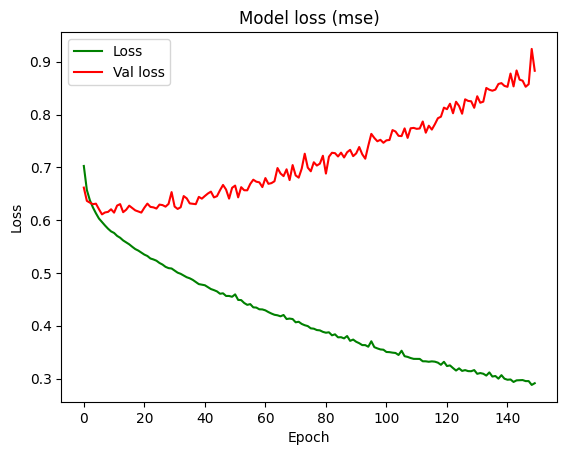

In [10]:
show_plot(history)

Compile model with `adadelta` optimizer

In [11]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(optimizer=tf.keras.optimizers.Adadelta(
    learning_rate=0.1
), loss='mean_squared_error')

Print `adadelta`'s plot

In [12]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=150)

Epoch 1/150
10/10 [==============================] - 0s 5ms/step - loss: 0.2718 - val_loss: 0.2576
Epoch 2/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2685 - val_loss: 0.2544
Epoch 3/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2658 - val_loss: 0.2511
Epoch 4/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2628 - val_loss: 0.2482
Epoch 5/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2605 - val_loss: 0.2464
Epoch 6/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2585 - val_loss: 0.2445
Epoch 7/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2565 - val_loss: 0.2425
Epoch 8/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2547 - val_loss: 0.2410
Epoch 9/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2530 - val_loss: 0.2390
Epoch 10/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2511 - val_loss: 0.2373
Epoch 11/

10/10 [==============================] - 0s 1ms/step - loss: 0.2087 - val_loss: 0.2120
Epoch 84/150
10/10 [==============================] - 0s 4ms/step - loss: 0.2084 - val_loss: 0.2119
Epoch 85/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2082 - val_loss: 0.2118
Epoch 86/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2080 - val_loss: 0.2114
Epoch 87/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2077 - val_loss: 0.2116
Epoch 88/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2076 - val_loss: 0.2114
Epoch 89/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2074 - val_loss: 0.2115
Epoch 90/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2072 - val_loss: 0.2114
Epoch 91/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2069 - val_loss: 0.2113
Epoch 92/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2068 - val_loss: 0.2113
Epoch 93/150


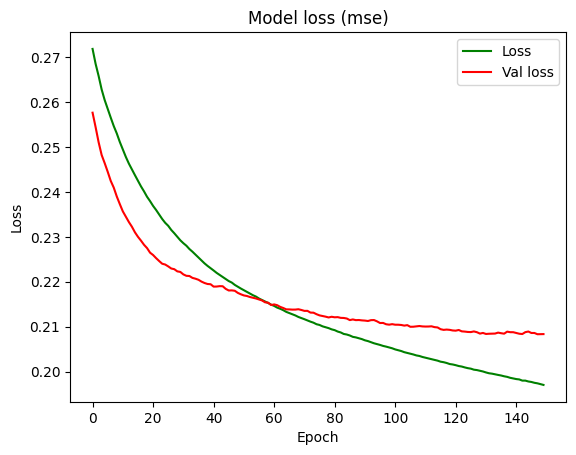

In [13]:
show_plot(history)

Compile model with `adagrad` optimizer

In [29]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(optimizer=tf.keras.optimizers.Adagrad(
    learning_rate=0.01
), loss='mean_squared_error')

Print `adagrad`'s plot

In [30]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=150)

Epoch 1/150
10/10 [==============================] - 0s 5ms/step - loss: 0.3927 - val_loss: 0.3967
Epoch 2/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3774 - val_loss: 0.3780
Epoch 3/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3630 - val_loss: 0.3626
Epoch 4/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3514 - val_loss: 0.3504
Epoch 5/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3419 - val_loss: 0.3388
Epoch 6/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3329 - val_loss: 0.3274
Epoch 7/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3242 - val_loss: 0.3186
Epoch 8/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3176 - val_loss: 0.3113
Epoch 9/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3120 - val_loss: 0.3056
Epoch 10/150
10/10 [==============================] - 0s 1ms/step - loss: 0.3078 - val_loss: 0.3014
Epoch 11/

10/10 [==============================] - 0s 1ms/step - loss: 0.2334 - val_loss: 0.2369
Epoch 84/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2331 - val_loss: 0.2366
Epoch 85/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2328 - val_loss: 0.2364
Epoch 86/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2325 - val_loss: 0.2362
Epoch 87/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2323 - val_loss: 0.2360
Epoch 88/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2319 - val_loss: 0.2358
Epoch 89/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2317 - val_loss: 0.2354
Epoch 90/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2315 - val_loss: 0.2352
Epoch 91/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2311 - val_loss: 0.2350
Epoch 92/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2309 - val_loss: 0.2347
Epoch 93/150


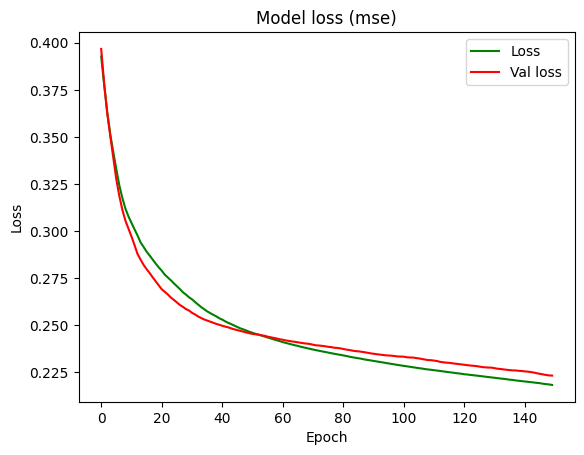

In [31]:
show_plot(history)

Compile model with `adamax` optimizer

In [32]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(250, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(250, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(optimizer=tf.keras.optimizers.Adamax(
    learning_rate=0.001
), loss='mean_squared_error')

Print `adamax`'s plot

In [33]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=30)

Epoch 1/30
10/10 [==============================] - 0s 5ms/step - loss: 0.2394 - val_loss: 0.2165
Epoch 2/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2170 - val_loss: 0.2127
Epoch 3/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2097 - val_loss: 0.2154
Epoch 4/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2062 - val_loss: 0.2182
Epoch 5/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2033 - val_loss: 0.2099
Epoch 6/30
10/10 [==============================] - 0s 2ms/step - loss: 0.2007 - val_loss: 0.2092
Epoch 7/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1989 - val_loss: 0.2115
Epoch 8/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1965 - val_loss: 0.2135
Epoch 9/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1946 - val_loss: 0.2157
Epoch 10/30
10/10 [==============================] - 0s 2ms/step - loss: 0.1932 - val_loss: 0.2115
Epoch 11/30
10/10 [

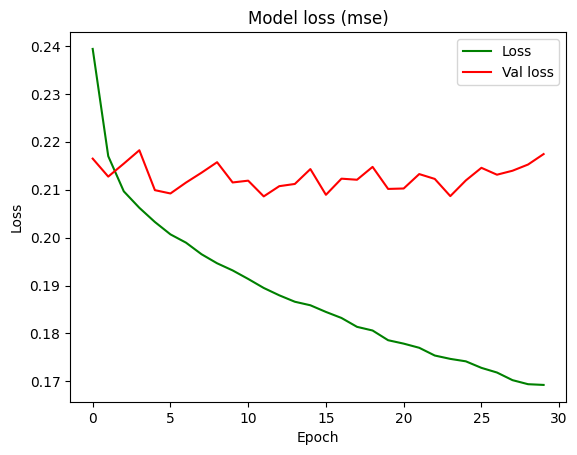

In [34]:
show_plot(history)

Compile model with `nadam` optimizer

In [35]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(optimizer=tf.keras.optimizers.Nadam(
    learning_rate=0.0001
), loss='mean_absolute_error')

Print `nadam`'s plot

In [36]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=500)

Epoch 1/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5278 - val_loss: 0.5365
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5261 - val_loss: 0.5341
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5242 - val_loss: 0.5315
Epoch 4/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5222 - val_loss: 0.5292
Epoch 5/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5204 - val_loss: 0.5265
Epoch 6/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5183 - val_loss: 0.5237
Epoch 7/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5161 - val_loss: 0.5211
Epoch 8/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5140 - val_loss: 0.5179
Epoch 9/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5114 - val_loss: 0.5149
Epoch 10/500
10/10 [==============================] - 0s 1ms/step - loss: 0.5089 - val_loss: 0.5118
Epoch 11/

10/10 [==============================] - 0s 1ms/step - loss: 0.3855 - val_loss: 0.3851
Epoch 84/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3846 - val_loss: 0.3845
Epoch 85/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3837 - val_loss: 0.3839
Epoch 86/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3828 - val_loss: 0.3833
Epoch 87/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3820 - val_loss: 0.3828
Epoch 88/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3813 - val_loss: 0.3824
Epoch 89/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3805 - val_loss: 0.3818
Epoch 90/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3798 - val_loss: 0.3812
Epoch 91/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3791 - val_loss: 0.3808
Epoch 92/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3783 - val_loss: 0.3805
Epoch 93/500


10/10 [==============================] - 0s 1ms/step - loss: 0.3459 - val_loss: 0.3647
Epoch 165/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3456 - val_loss: 0.3647
Epoch 166/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3453 - val_loss: 0.3647
Epoch 167/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3451 - val_loss: 0.3645
Epoch 168/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3447 - val_loss: 0.3645
Epoch 169/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3445 - val_loss: 0.3644
Epoch 170/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3441 - val_loss: 0.3644
Epoch 171/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3440 - val_loss: 0.3644
Epoch 172/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3435 - val_loss: 0.3640
Epoch 173/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3432 - val_loss: 0.3639
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 0.3252 - val_loss: 0.3576
Epoch 246/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3249 - val_loss: 0.3578
Epoch 247/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3247 - val_loss: 0.3580
Epoch 248/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3244 - val_loss: 0.3580
Epoch 249/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3243 - val_loss: 0.3580
Epoch 250/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3240 - val_loss: 0.3581
Epoch 251/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3237 - val_loss: 0.3579
Epoch 252/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3234 - val_loss: 0.3578
Epoch 253/500
10/10 [==============================] - 0s 2ms/step - loss: 0.3233 - val_loss: 0.3578
Epoch 254/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3230 - val_loss: 0.3578
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 0.3064 - val_loss: 0.3590
Epoch 327/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3062 - val_loss: 0.3590
Epoch 328/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3060 - val_loss: 0.3590
Epoch 329/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3058 - val_loss: 0.3590
Epoch 330/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3055 - val_loss: 0.3588
Epoch 331/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3054 - val_loss: 0.3590
Epoch 332/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3051 - val_loss: 0.3591
Epoch 333/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3049 - val_loss: 0.3592
Epoch 334/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3046 - val_loss: 0.3593
Epoch 335/500
10/10 [==============================] - 0s 1ms/step - loss: 0.3045 - val_loss: 0.3593
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 0.2875 - val_loss: 0.3649
Epoch 408/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2873 - val_loss: 0.3652
Epoch 409/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2870 - val_loss: 0.3654
Epoch 410/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2869 - val_loss: 0.3655
Epoch 411/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2867 - val_loss: 0.3657
Epoch 412/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2863 - val_loss: 0.3659
Epoch 413/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2862 - val_loss: 0.3659
Epoch 414/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2859 - val_loss: 0.3661
Epoch 415/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2856 - val_loss: 0.3661
Epoch 416/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2854 - val_loss: 0.3661
Epoc

10/10 [==============================] - 0s 1ms/step - loss: 0.2710 - val_loss: 0.3728
Epoch 489/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2708 - val_loss: 0.3727
Epoch 490/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2707 - val_loss: 0.3727
Epoch 491/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2706 - val_loss: 0.3728
Epoch 492/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2704 - val_loss: 0.3728
Epoch 493/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2703 - val_loss: 0.3728
Epoch 494/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2701 - val_loss: 0.3728
Epoch 495/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2699 - val_loss: 0.3729
Epoch 496/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2697 - val_loss: 0.3728
Epoch 497/500
10/10 [==============================] - 0s 1ms/step - loss: 0.2697 - val_loss: 0.3727
Epoc

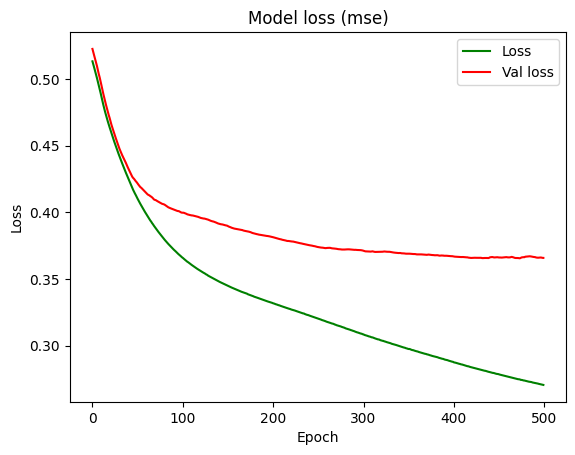

In [22]:
show_plot(history)

Compile model with `sgd` optimizer

In [42]:
# setup model
model = tf.keras.Sequential()

# add layers
model.add(tf.keras.layers.Dense(200, activation='relu', input_shape=(n_cols,)))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# compile
model.compile(optimizer=tf.keras.optimizers.SGD(
    learning_rate=0.01
), loss='mean_squared_error')


Print `sgd`'s plot

In [43]:
history = model.fit(train_X, train_Y, validation_split=0.2, epochs=150)

Epoch 1/150
10/10 [==============================] - 0s 5ms/step - loss: 0.2446 - val_loss: 0.2369
Epoch 2/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2431 - val_loss: 0.2357
Epoch 3/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2416 - val_loss: 0.2346
Epoch 4/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2405 - val_loss: 0.2336
Epoch 5/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2393 - val_loss: 0.2325
Epoch 6/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2383 - val_loss: 0.2322
Epoch 7/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2375 - val_loss: 0.2317
Epoch 8/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2366 - val_loss: 0.2312
Epoch 9/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2359 - val_loss: 0.2309
Epoch 10/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2351 - val_loss: 0.2306
Epoch 11/

10/10 [==============================] - 0s 2ms/step - loss: 0.2105 - val_loss: 0.2192
Epoch 84/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2103 - val_loss: 0.2191
Epoch 85/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2100 - val_loss: 0.2188
Epoch 86/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2099 - val_loss: 0.2187
Epoch 87/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2096 - val_loss: 0.2187
Epoch 88/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2095 - val_loss: 0.2186
Epoch 89/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2093 - val_loss: 0.2186
Epoch 90/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2091 - val_loss: 0.2184
Epoch 91/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2090 - val_loss: 0.2187
Epoch 92/150
10/10 [==============================] - 0s 1ms/step - loss: 0.2087 - val_loss: 0.2188
Epoch 93/150


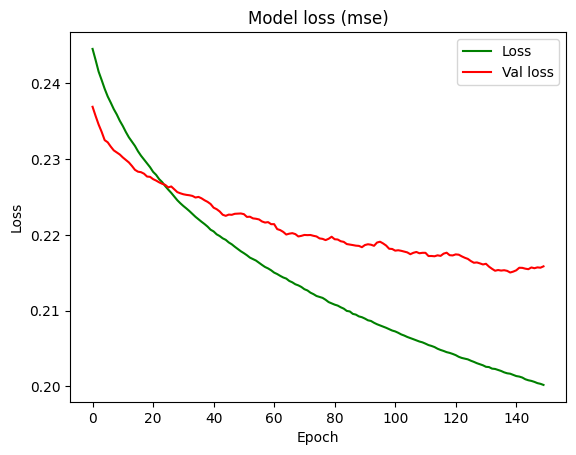

In [44]:
show_plot(history)
